# Deep-Learning-Based Segmentation of Small Extracellular Vesicles in Transmission Electron Microscopy Images

Author of the notebook: Estibaliz Gómez de Mariscal

## CNN architecture: Fully residual U-Net (FRUNet)

<img src="https://media.springernature.com/lw685/springer-static/image/art%3A10.1038%2Fs41598-019-49431-3/MediaObjects/41598_2019_49431_Fig2_HTML.png">

## References

If you use this notebook, it is expected that the original paper is cited:
```
Estibaliz Gómez-de-Mariscal, Martin Maška, Anna Kotrbová, Vendula Pospíchalová, Pavel Matula, Arrate Muñoz-Barrutia. 
Deep-Learning-Based Segmentation of Small Extracellular Vesicles in Transmission Electron Microscopy Images. 
Scientific Reports, 9(1):13211, 2019.
```
You can access the original paper [here](https://www.sciencedirect.com/science/article/pii/S2352711018301882?via%3Dihub)

<img src=https://media.springernature.com/m685/springer-static/image/art%3A10.1038%2Fs41598-019-49431-3/MediaObjects/41598_2019_49431_Fig1_HTML.png>

## Data
The example data consists of transmission electron microscopy (TEM) images of small extracellular vessicles (sEV). Further information can be found at [CBIA Massaryk University](https://cbia.fi.muni.cz/research/segmentation/fru-net).

<img src=https://media.springernature.com/lw685/springer-static/image/art%3A10.1038%2Fs41598-019-49431-3/MediaObjects/41598_2019_49431_Fig3_HTML.png>




# Code installation

We first install the dependencies. It will ask us to restart the runtime. 

**Do not execute the `!pip uninstall tensorflow -y` uninstall cell again.**

In [1]:
!pip uninstall tensorflow -y

Uninstalling tensorflow-2.4.1:
  Successfully uninstalled tensorflow-2.4.1


In [1]:
!pip install SimpleITK==1.1
!pip install tensorflow-gpu==1.13.1
!pip install keras==1.2.2
!pip install skimage
!pip install scikit-image
!pip install Pillow==4.3.0

  Using cached https://files.pythonhosted.org/packages/3b/ee/edbfa69ba7b7d9726e634bfbeefd04b5a1764e9e74867ec916113eeaf4a1/skimage-0.0.tar.gz
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


## Download the FRUNet package
Then, the package to segment small extracellular vesicles is downloaded from the CBIA, Massaryk University. 

This package is unziped in the `/conttent/`of your Colab session: `/content/FRU_processing`.

Once the data is downloaded, the raw images and instance segmentation annotations are stored at `/content/FRU_processing/code/data`.

In [2]:
!wget --no-check-certificate https://cbia.fi.muni.cz/files/segmentation/fru-net/FRU_processing.zip
!unzip FRU_processing.zip

--2021-03-03 09:46:02--  https://cbia.fi.muni.cz/files/segmentation/fru-net/FRU_processing.zip
Resolving cbia.fi.muni.cz (cbia.fi.muni.cz)... 147.251.48.2, 2001:718:801:230::2
Connecting to cbia.fi.muni.cz (cbia.fi.muni.cz)|147.251.48.2|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 925476068 (883M) [application/zip]
Saving to: ‘FRU_processing.zip’

FRU_processing.zip  100%[===================>] 882.60M  19.0MB/s    in 48s     

2021-03-03 09:46:50 (18.6 MB/s) - ‘FRU_processing.zip’ saved [925476068/925476068]

Archive:  FRU_processing.zip
   creating: FRU_processing/
   creating: FRU_processing/code/
   creating: FRU_processing/code/data/
   creating: FRU_processing/code/data/annotations_01/
  inflating: FRU_processing/code/data/annotations_01/seg_01.tif  
  inflating: FRU_processing/code/data/annotations_01/seg_02.tif  
  inflating: FRU_processing/code/data/annotations_01/seg_03.tif  
  inflating: FRU_proce

## Place the working path into the FRUNet code path

In [3]:
import os
os.chdir('/content/FRU_processing/code')
# !python process_images.py


## Check if there is any GPU available

In [ ]:
# !pip freeze | grep -i -e tensorflow

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

In [5]:
import tensorflow as tf
if tf.test.gpu_device_name()=='':
  print('You do not have GPU access.') 
else:
  print('You have GPU access')
  !nvidia-smi


# print the tensorflow version
print('Tensorflow version is ' + str(tf.__version__))

You have GPU access
Wed Mar  3 09:47:19 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    26W /  70W |    104MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                    

# Run segmentation

In [6]:
## Import the required packages.
#--------------------------------------------------------------------------------------------------
import os
import numpy as np
import SimpleITK as sitk
import skimage
import glob
import pandas
import time
from keras.models import load_model
from functions import unet_segmentation
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [7]:
## Update the paths to your machine
#--------------------------------------------------------------------------------------------------
# data_folder = 'data/dataset_01'
# data_folder = 'data/dataset_02'
data_folder = 'data/dataset_03'
annotations_folder = 'data/annotations_03'
output_path = 'fru_results/'

# Read the paths.
#--------------------------------------------------------------------------------------------------
resolution_file = '/resolution.xlsx'
path2im = glob.glob(data_folder + '/*.tif')
path2im.sort()
resolution = pandas.read_excel(data_folder + resolution_file)
resolution = np.array(resolution)

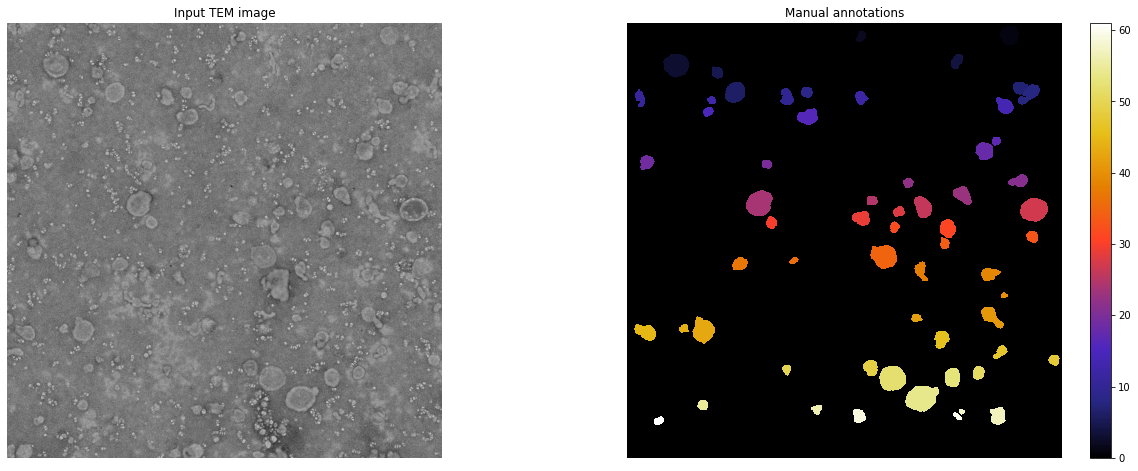

In [8]:
# Image visualization
i = 0

im_number = path2im[i].split('/')[-1].split('.tif')[0]

example_im = sitk.ReadImage(path2im[i])
example_im = sitk.GetArrayFromImage(example_im)

annotation_im = os.path.join(annotations_folder, 'seg_{}.tif'.format(im_number))
annotation_im = sitk.ReadImage(annotation_im)
annotation_im = sitk.GetArrayFromImage(annotation_im)


plt.figure(figsize=(22,8))
plt.subplot(1,2,1)
plt.imshow(example_im, cmap = 'gray', )
plt.axis('off')
plt.title('Input TEM image')
plt.subplot(1,2,2)
plt.imshow(annotation_im, 'CMRmap', interpolation='nearest')
plt.axis('off')
plt.colorbar()
plt.title('Manual annotations')
plt.show()

In [9]:
# Choose the model
#--------------------------------------------------------------------------------------------------

# Load FRU1.
# model = load_model('fully_residual_dropout_segmentation_03_04.h5')

# Load FRU2.
# model = load_model('fully_residual_dropout_segmentation_01_04.h5')

# Load FRU3.
model = load_model('fully_residual_dropout_segmentation.h5')

# Load model U1.
# model = load_model('unet_segmentation_3_4_reduce_learning_rate_400.h5')

# Load model U2.
# model = load_model('unet_segmentation_1_4_reduce_learning_rate_400.h5')

# Load model U3.
# model = load_model('unet_dropout_segmentation.h5')

# Load FRU trained only with Dataset 2.
# model = load_model('fully_residual_dropout_segmentation_03_nonoverfit.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [10]:
## Set the required parameters.
#--------------------------------------------------------------------------------------------------
final_resolution = 1.566
dataset_num = 4
patch_size = 400
overlap = 125 
min_size = np.round(np.pi*((30/2)**2)/(final_resolution**2))
split_clusters = 1
min_hole_size = 25
top_hat_size = 10
sigma = 3
smooth_t = 0.4
min_size = np.round(np.pi*((30/2)**2)/(final_resolution**2))




# Set tau threshold for probability maps
#--------------------------------------------------------------------------------------------------
threshold = 0.5


# Start image processing. 
#--------------------------------------------------------------------------------------------------
for f in range(len(path2im)):   
    start = time.time()
    print(path2im[f])
    print("Detected small extracellular vessicles")
    bin_image, markers, im = unet_segmentation(path2im[f], dataset_num, resolution[f,1],
                            final_resolution, patch_size, threshold, overlap, min_size, model,
                            split_clusters, min_hole_size, top_hat_size, sigma, smooth_t)
    end = time.time()
    
    
    print('Segmentation finished in ', (end-start), ' secs')
    print("")

    with open("processing_time_FRU.txt", "a") as text_file:
        text_file.write("Frame %s: segmentation finished in %f" % (f, (end-start)))
       
    # Save the results as .tif files. 
    #-----------------------------------------------------------------------------------------------
    sitk.WriteImage(sitk.GetImageFromArray(bin_image.astype(np.int8)),output_path + path2im[f][-6:-4] +'_binary.tif')
    sitk.WriteImage(sitk.GetImageFromArray(markers.astype(np.int16)),output_path + path2im[f][-6:-4] +'_labels.tif')
    sitk.WriteImage(sitk.GetImageFromArray(im),output_path + path2im[f][-6:-4] +'.tif')


data/dataset_03/01.tif
Detected small extracellular vessicles
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


/content/FRU_processing/code/functions.py:214: UserWarning: Image dtype is not float. By default radon will assume you want to preserve the range of your image (preserve_range=True). In scikit-image 0.18 this behavior will change to preserve_range=False. To avoid this warning, explicitly specify the preserve_range parameter.
  sinogram = skimage.transform.radon(CI_aux, theta=theta, circle = False)


Segmentation finished in  39.48230004310608  secs

data/dataset_03/02.tif
Detected small extracellular vessicles
0
1
2
3
4
5
6
7
8
Segmentation finished in  2.4523823261260986  secs

data/dataset_03/03.tif
Detected small extracellular vessicles
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
Segmentation finished in  4.3376500606536865  secs

data/dataset_03/04.tif
Detected small extracellular vessicles
0
1
2
3
Segmentation finished in  0.7084076404571533  secs

data/dataset_03/05.tif
Detected small extracellular vessicles
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
Segmentation finished in  30.088226556777954  secs

data/dataset_03/06.tif
Detected small extracellular vessicles
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
Segmentation finished in  6.627320766448975  secs

data/dataset_03/07.tif
Detected small extracellular vessicles
0
1
2
3
4
5
6
7
8
Segmentation finished in  5.413812

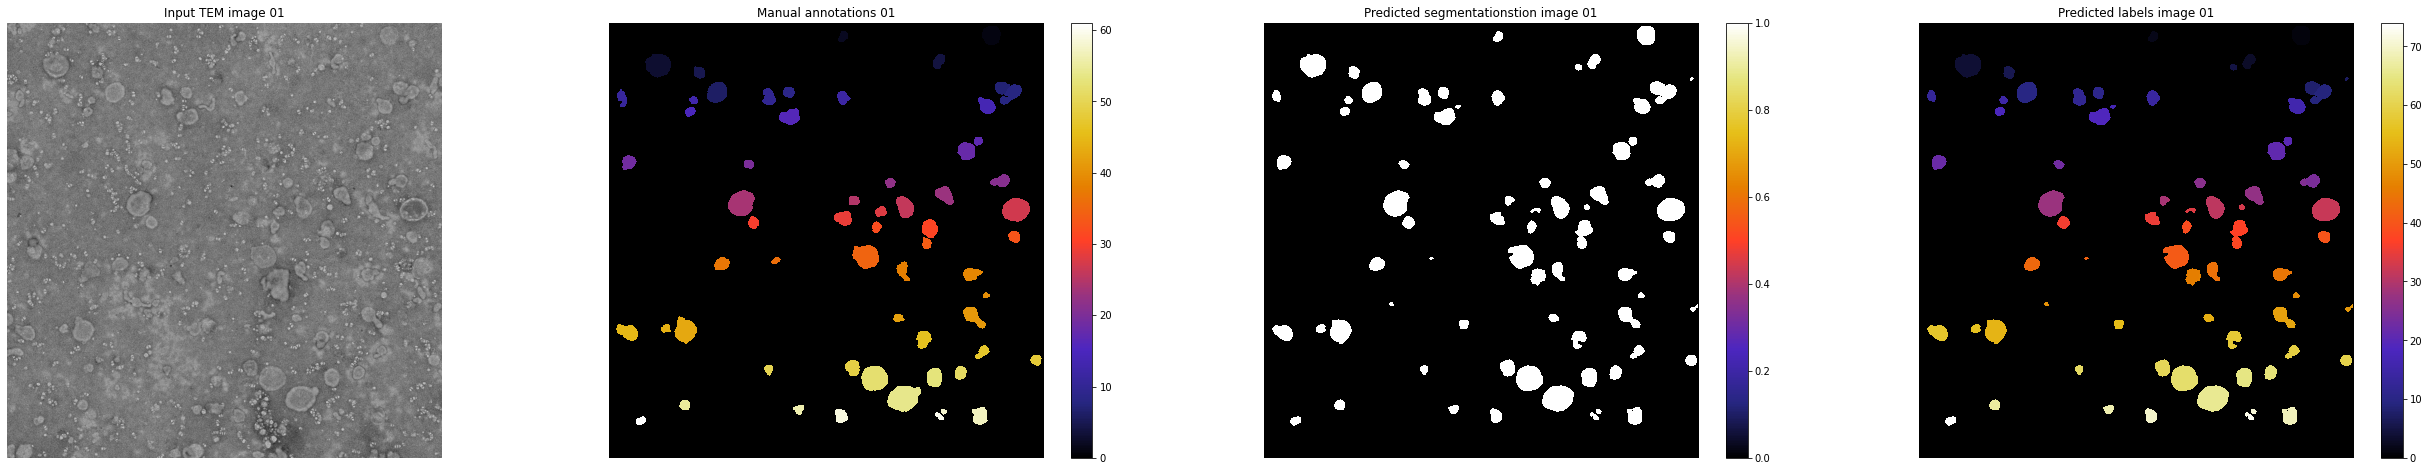

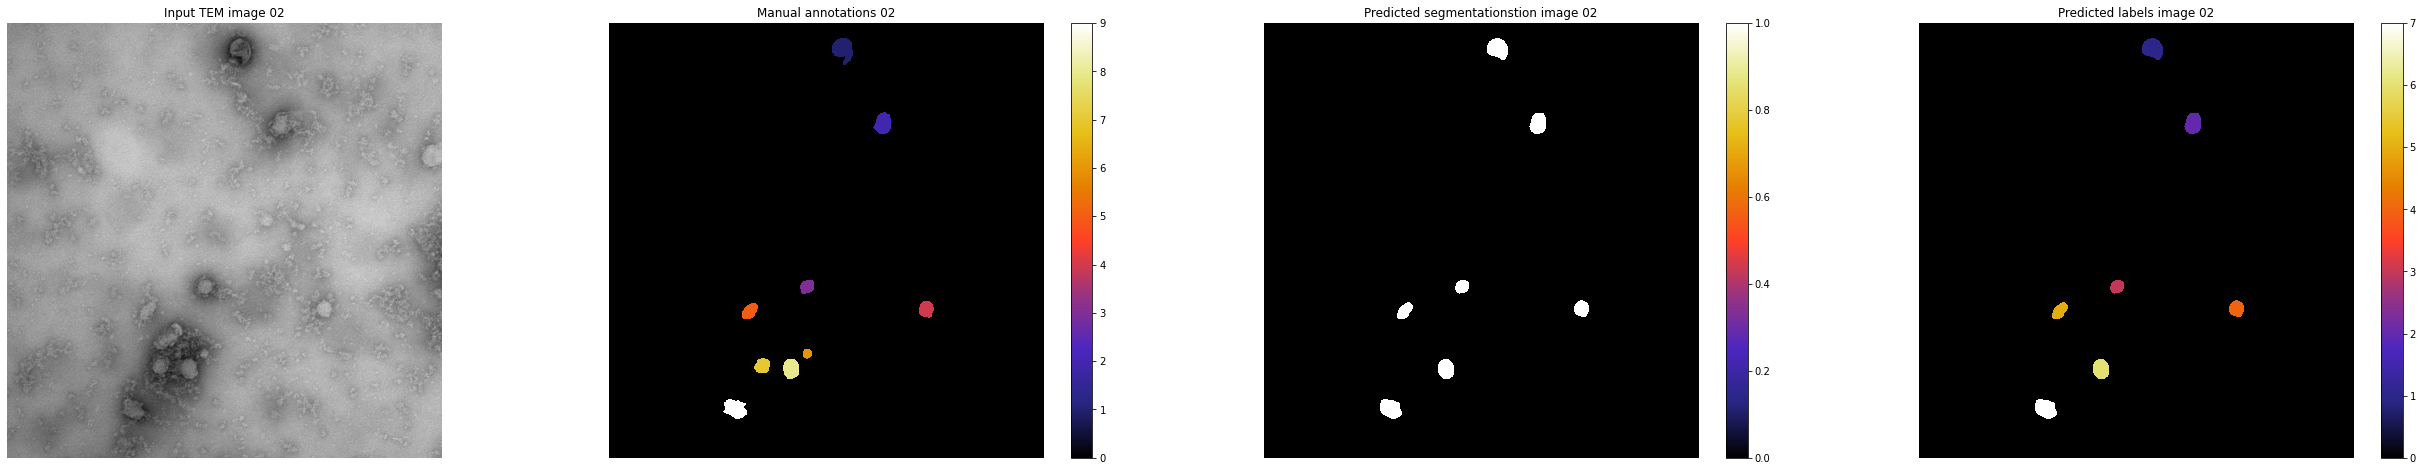

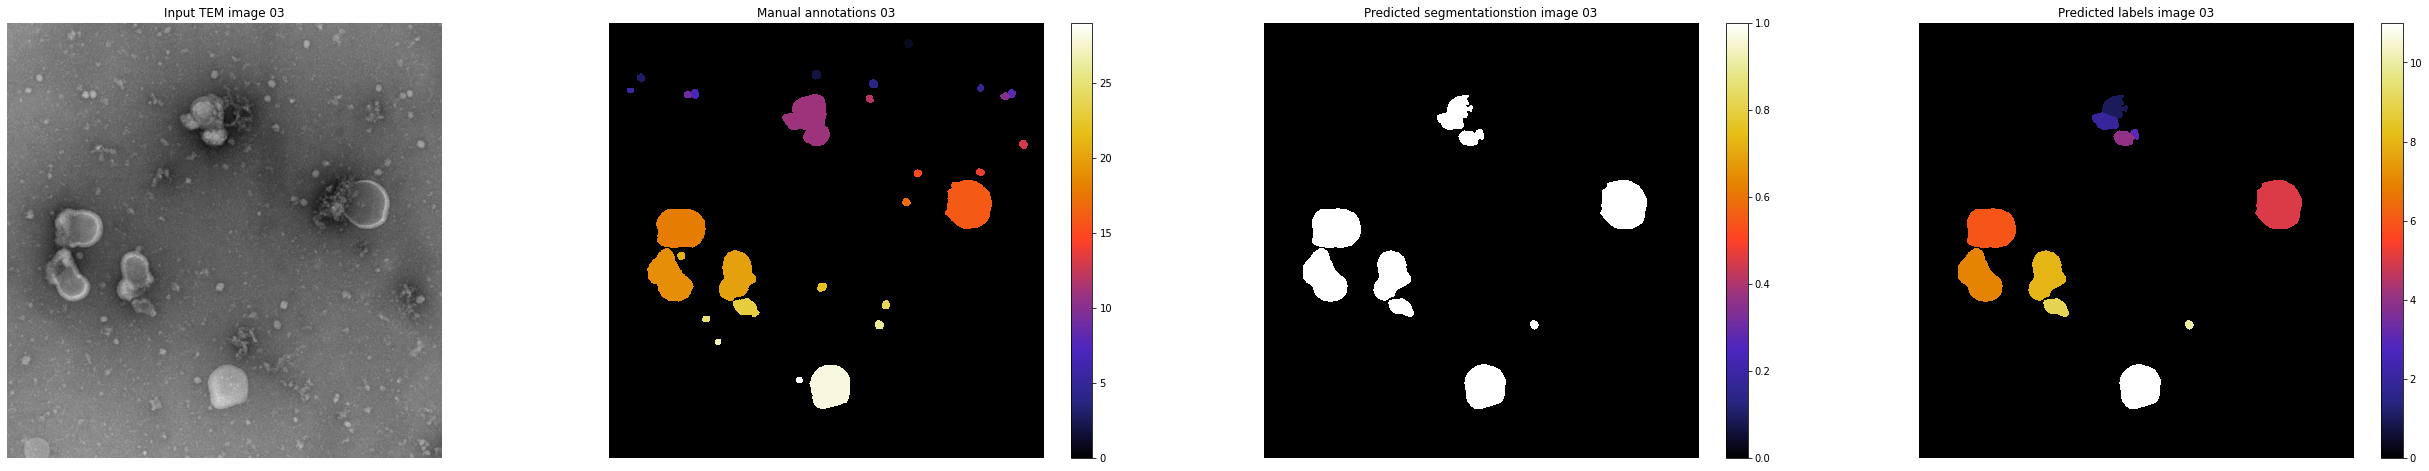

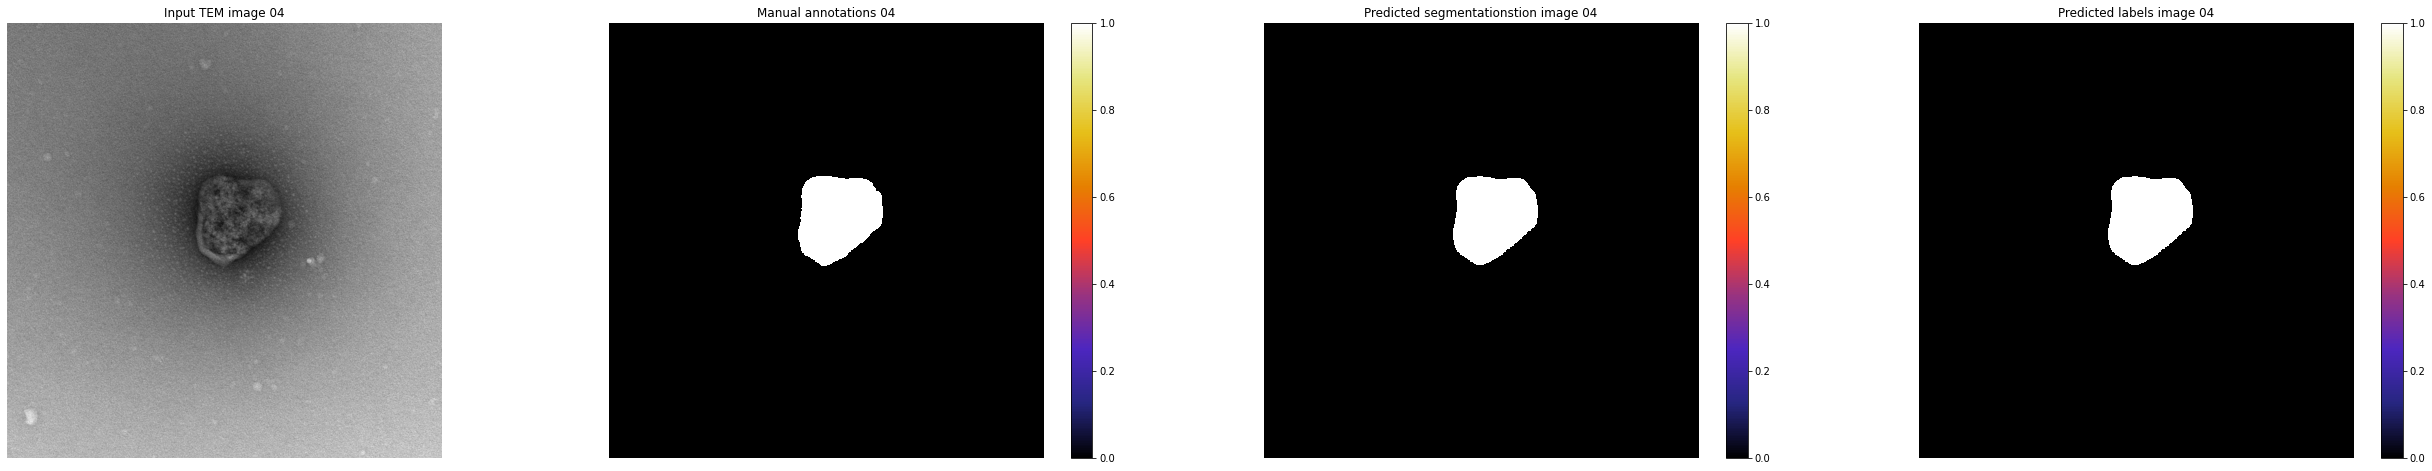

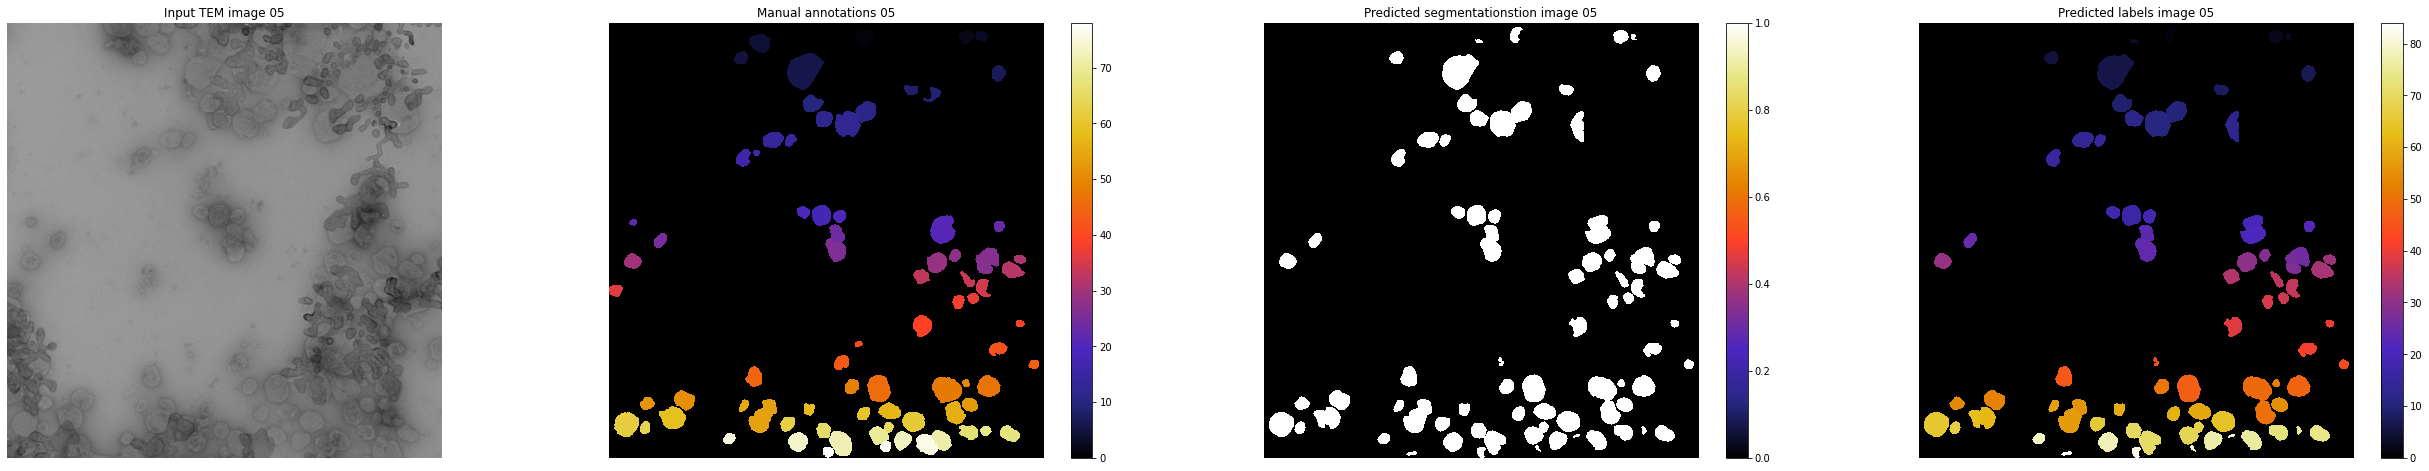

In [12]:
# Image visualization
i = 0
for i in range(5):
    im_number = path2im[i].split('/')[-1].split('.tif')[0]

    example_im = sitk.ReadImage(path2im[i])
    example_im = sitk.GetArrayFromImage(example_im)

    annotation_im = os.path.join(annotations_folder, 'seg_{}.tif'.format(im_number))
    annotation_im = sitk.ReadImage(annotation_im)
    annotation_im = sitk.GetArrayFromImage(annotation_im)

    segmented_im = os.path.join(output_path, '{}_binary.tif'.format(im_number))
    segmented_im = sitk.ReadImage(segmented_im)
    segmented_im = sitk.GetArrayFromImage(segmented_im)

    instances_im = os.path.join(output_path, '{}_labels.tif'.format(im_number))
    instances_im = sitk.ReadImage(instances_im)
    instances_im = sitk.GetArrayFromImage(instances_im)


    plt.figure(figsize=(45,8))
    plt.subplot(1,4,1)
    plt.imshow(example_im, cmap = 'gray', )
    plt.axis('off')
    plt.title('Input TEM image {}'.format(im_number))
    plt.subplot(1,4,2)
    plt.imshow(annotation_im, 'CMRmap', interpolation='nearest')
    plt.axis('off')
    plt.colorbar()
    plt.title('Manual annotations {}'.format(im_number))
    plt.subplot(1,4,3)
    plt.imshow(segmented_im, 'CMRmap', interpolation='nearest')
    plt.axis('off')
    plt.colorbar()
    plt.title('Predicted segmentationstion image {}'.format(im_number))
    plt.subplot(1,4,4)
    plt.imshow(instances_im, 'CMRmap', interpolation='nearest')
    plt.axis('off')
    plt.colorbar()
    plt.title('Predicted labels image {}'.format(im_number))
    plt.show()

# Fine-tune your model

Note that this code is written in TenssorFlow 1.13, which will be depricated soon. Ideally, you should try to find the way to load model weights in tensorflow 2.x.

This model was trained for images with pixel size 1.56 nm, therefore, the weights of this network are trained for that image resolution. Nonetheless, while finetunning, the network should be able to addapt the weights to the new image resolution in case it is changed. 

**Note tha this is just a demo to show how to train the network, please, ellaborate more on the input training data.**

In [17]:
!ls

data
fru_results
fully_residual_dropout_segmentation_01_04.h5
fully_residual_dropout_segmentation_03_04.h5
fully_residual_dropout_segmentation_03_nonoverfit.h5
fully_residual_dropout_segmentation.h5
functions.py
process_images.py
processing_time_FRU.txt
__pycache__
README
stable-req.txt
unet_dropout_segmentation.h5
unet_segmentation_1_4_reduce_learning_rate_400.h5
unet_segmentation_3_4_reduce_learning_rate_400.h5


In [51]:
from functions import linear_stretch

## Images in dataset 2 have pixel size 1.56nm
#--------------------------------------------------------------------------------------------------
data_folder_new_im = '/content/FRU_processing/code/data/dataset_02'
annotations_folder = '/content/FRU_processing/code/data/annotations_02'

# Read the paths.
#--------------------------------------------------------------------------------------------------


path2im = glob.glob(data_folder_new_im + '/*.tif')
path2im.sort()

# Read training images
train_imgs = []
train_masks = []
for im in path2im:
    im_number = im.split('/')[-1].split('.tif')[0]

    example_im = sitk.ReadImage(im)
    example_im = sitk.GetArrayFromImage(example_im)
    train_imgs.append(example_im)
    annotation_im = os.path.join(annotations_folder, 'seg_{}.tif'.format(im_number))
    annotation_im = sitk.ReadImage(annotation_im)
    annotation_im = sitk.GetArrayFromImage(annotation_im)
    annotation_im = (annotation_im>0).astype(np.uint8)
    train_masks.append(annotation_im)


def create_random_patches( imgs, masks, num_patches, shape ):
    ''' Create a list of images patches out of a list of images
    Args:
        imgs (list): input images.
        masks (list): binary masks (output images) corresponding to imgs.
        num_patches (int): number of patches for each image.
        shape (2D array): size of the patches. Example: [256, 256].
        
    Returns:
        list of image patches and patches of corresponding labels (background,
        foreground and contours)
    '''
    original_size = imgs[0].shape
    
    input_patches = []
    output_patches = []
    for n in range( 0, len( imgs ) ):
        image = imgs[ n ]
        mask = masks[ n ]
        for i in range( num_patches ):
          r = np.random.randint(0,original_size[0]-shape[0])
          c = np.random.randint(0,original_size[1]-shape[1])
          input_patches.append( image[ r : r + shape[0],
                                  c : c + shape[1] ] )
          output_patches.append( mask[ r : r + shape[0],
                                  c : c + shape[1] ] )
    return input_patches, output_patches

train_x, train_y = create_random_patches( train_imgs, train_masks, 10, [400,400] )

# Normalize patches intensity values:
train_x = [linear_stretch(p, 0, 1) for p in train_x]

print('Training patches: {}'.format(len(train_x)))

# Remove the loaded images to free some memory
del train_imgs, train_masks

Training patches: 140


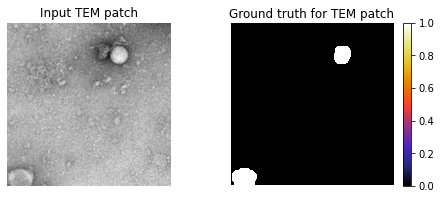

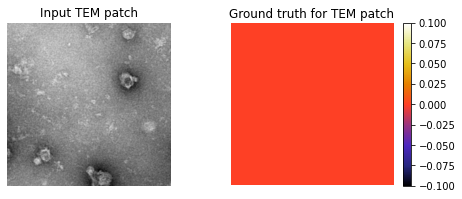

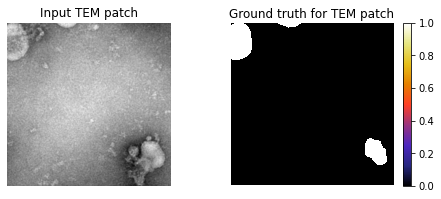

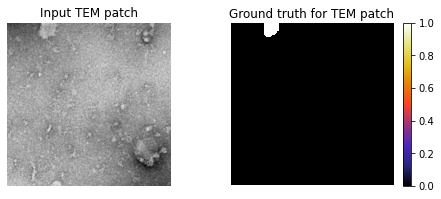

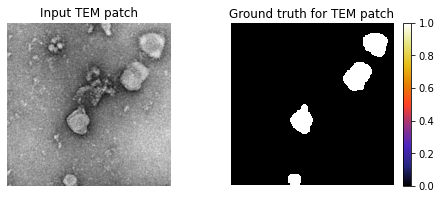

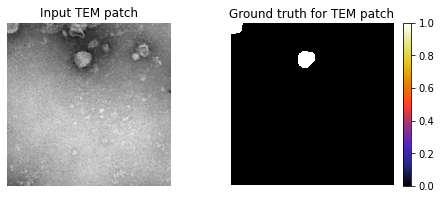

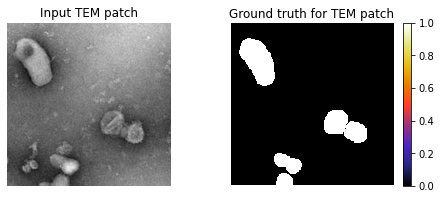

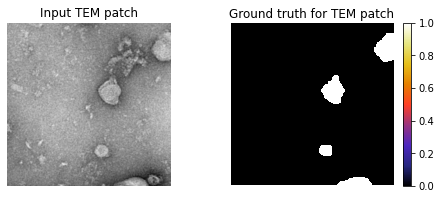

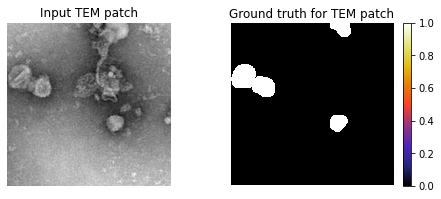

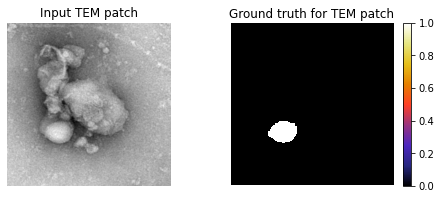

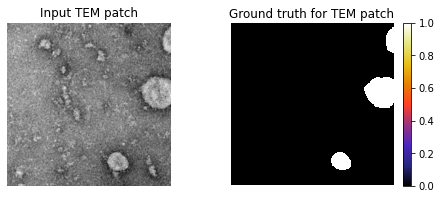

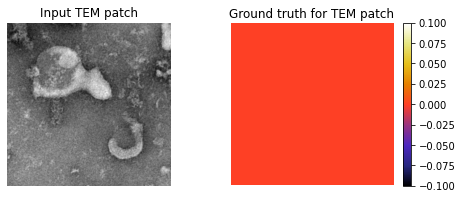

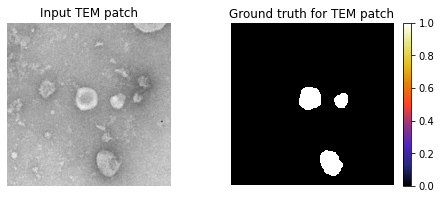

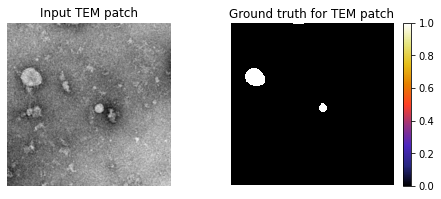

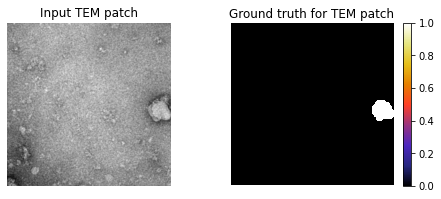

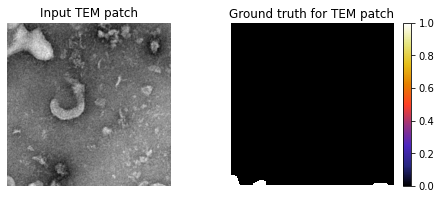

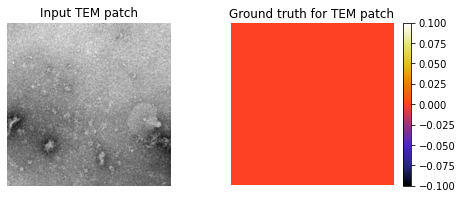

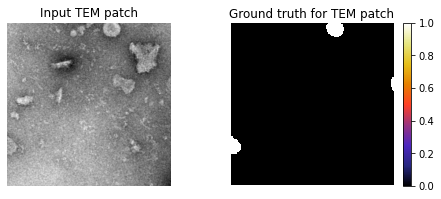

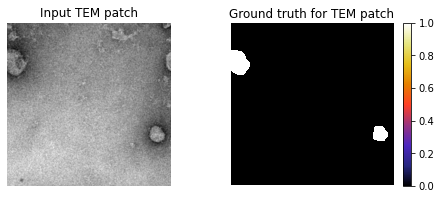

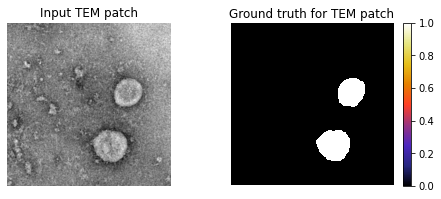

In [52]:
for i in range(20):
  plt.figure(figsize=(8,3))
  plt.subplot(1,2,1)
  plt.imshow(train_x[i], cmap = 'gray', )
  plt.axis('off')
  plt.title('Input TEM patch')
  plt.subplot(1,2,2)
  plt.imshow(train_y[i], 'CMRmap', interpolation='nearest')
  plt.axis('off')
  plt.colorbar()
  plt.title('Ground truth for TEM patch')
  plt.show()

In [53]:
#Addapt the shape of the images to the network's input shape requirements
train_x = np.array(train_x)
train_x = np.expand_dims(train_x, -1)
train_y = np.array(train_y)
train_y = np.expand_dims(train_y, -1)

## Compile the model again
 This is necessary to change the learning rate and add the loss functiona and optimizer. 

As we are doing finetunning, the learning rate should be very small to avoid destroying the pretrained weights. Actually, one could try to freeze some of the layers of the network such as the encoder path and do some experimental workt to fine-tune the model. 




In [56]:
from keras.optimizers import Adam
from keras.metrics import binary_crossentropy
model.compile(optimizer=Adam(lr=0.00001),loss=binary_crossentropy, metrics=['accuracy'])
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 400, 400, 1)   0                                            
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 400, 400, 32)  320         input_1[0][0]                    
____________________________________________________________________________________________________
elu_1 (ELU)                      (None, 400, 400, 32)  0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 400, 400, 32)  9248        elu_1[0][0]                      
___________________________________________________________________________________________

In [57]:
history = model.fit(train_x, train_y, nb_epoch=10, batch_size=15, validation_split=0.1)

Train on 126 samples, validate on 14 samples
Epoch 1/10
126/126 [==============================] - 34s - loss: 0.1383 - acc: 0.9847 - val_loss: 0.0781 - val_acc: 0.9911
Epoch 2/10
126/126 [==============================] - 12s - loss: 0.1117 - acc: 0.9862 - val_loss: 0.0711 - val_acc: 0.9913
Epoch 3/10
126/126 [==============================] - 12s - loss: 0.0950 - acc: 0.9870 - val_loss: 0.0667 - val_acc: 0.9907
Epoch 4/10
126/126 [==============================] - 12s - loss: 0.0794 - acc: 0.9881 - val_loss: 0.0623 - val_acc: 0.9906
Epoch 5/10
126/126 [==============================] - 12s - loss: 0.0681 - acc: 0.9889 - val_loss: 0.0583 - val_acc: 0.9906
Epoch 6/10
126/126 [==============================] - 13s - loss: 0.0611 - acc: 0.9891 - val_loss: 0.0545 - val_acc: 0.9906
Epoch 7/10
126/126 [==============================] - 12s - loss: 0.0512 - acc: 0.9897 - val_loss: 0.0513 - val_acc: 0.9906
Epoch 8/10
126/126 [==============================] - 12s - loss: 0.0458 - acc: 0.9899 

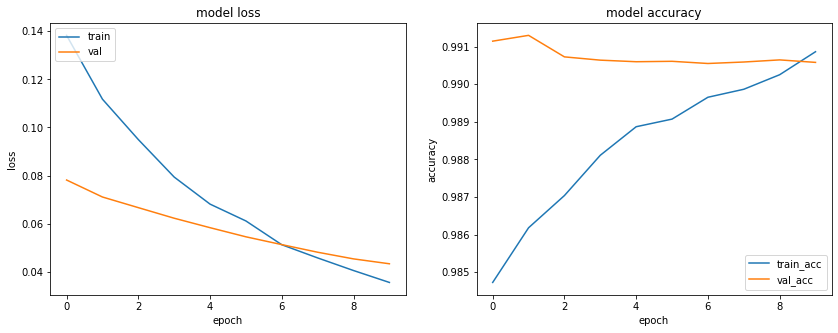

In [58]:
plt.figure(figsize=(14,5))

# Summarize history for loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

# Summarize history for Jaccard index
plt.subplot(1, 2, 2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'], loc='lower right')
plt.show()